# Metaheurística de Evolução Diferencial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

### Vamos otimizar a função de Rosenbrock, dada por:

$(a-x_{1})^{2} + b(x_{2} - x_{1}^{2})^{2}$

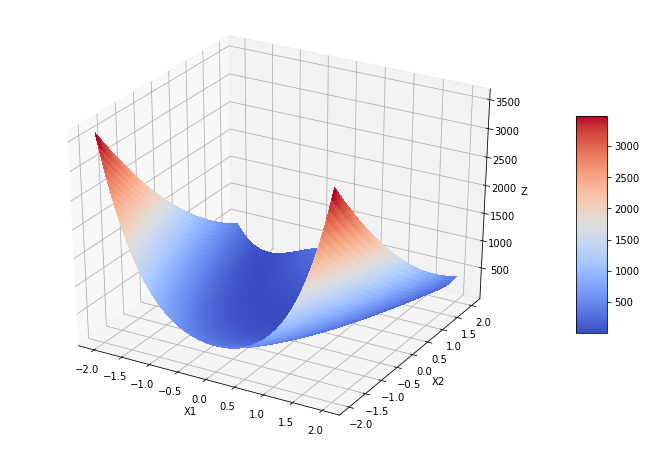

In [2]:
def rosenbrock(x1,x2):
    
    a = 1
    b = 100
    
    return (a-x1)**2+b*(x2-x1**2)**2

step = 100

x1 = np.linspace(-2, 2, step)
x2 = np.linspace(-2, 2, step)

x1, x2 = np.meshgrid(x1,x2)

z = rosenbrock(x1,x2)

fig = plt.figure(figsize=(12,8))

ax = fig.gca(projection='3d')

surf = ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')

plt.show()

Seu Mínimo Global está localizado em $(a,a^{2})$.

# Desenvolvendo o Algoritmo de Evolução Diferencial

In [3]:
# Função Para Inicializar a População Aleatória

def inicializa_populacao(lim_superior,lim_inferior,n_individuos):
    
    x1_inicial = np.random.uniform(lim_inferior,lim_superior,n_individuos)

    x2_inicial = np.random.uniform(lim_inferior,lim_superior,n_individuos)

    z_inicial = rosenbrock(x1_inicial, x2_inicial)
    
    return x1_inicial, x2_inicial, z_inicial


# Função Para Mutação dos Indivíduos

def mutação(n_individuos,x1,x2,fator):
    
    
    index = np.arange(len(x1))
    
    rand_index = np.random.permutation(index)   
                
    x1_orig = np.copy(x1)
    x2_orig = np.copy(x2) 
        
    x1_mutado = x1_orig[rand_index[0]] + fator*(x1_orig[rand_index[1]]-x1_orig[rand_index[2]])
    x2_mutado = x2_orig[rand_index[0]] + fator*(x2_orig[rand_index[1]]-x2_orig[rand_index[2]])
         
    return x1_mutado, x2_mutado


# Função Para Cruzamento

def cruzamento(x1_o,x2_o,x1_m,x2_m, taxa):
        
    
    r1 = np.random.uniform(0,1,1)
    r2 = np.random.uniform(0,1,1)

    if r1 > taxa:
        x1_new = x1_m
    else:
        x1_new = x1_o
    
    if r2 > taxa:
        x2_new = x2_m
    else:
        x2_new = x2_o

    
    f_old = rosenbrock(x1_o,x2_o)
    f_new = rosenbrock(x1_new,x2_new)


    return x1_new, x2_new, f_old, f_new

# Função Para Seleção

def selecao(x1_ol,x2_ol,x1_nw,x2_nw, f_nw,f_ol):
        

    if f_nw < f_ol:
        x1_vencedor = np.copy(x1_nw)
        x2_vencedor = np.copy(x2_nw)
        
    else:
        x1_vencedor = np.copy(x1_ol)
        x2_vencedor = np.copy(x2_ol)

    return x1_vencedor, x2_vencedor


# Função para PLOT Animado

def animate(x1,x2,ims,ax2):
    z = rosenbrock(x1,x2)
    im = ax2.plot(x1,x2,z,"o",c='red')
    ims.append(im)
    return ims

# Algoritmo Completo

def evolucao_diferencial(n_individuos, lim_inferior, lim_superior, max_iter, taxa, fator):
    
    f_best = []

    x1_otimo = []
    
    x2_otimo = []
    
    historico_x1 = []
    
    historico_x2 = []
    
    historico_z = []
    
    step=50

    x1 = np.linspace(-2, 2, step)
    x2 = np.linspace(-2, 2, step)

    x1, x2 = np.meshgrid(x1,x2)

    z = rosenbrock(x1,x2)    
    
    
    x1, x2, z_init = inicializa_populacao(lim_superior,lim_inferior,n_individuos)
    

    f_best.append(z_init.min())

    x1_otimo.append(x1[np.argmin(z_init)])
    
    x2_otimo.append(x2[np.argmin(z_init)])
    
    for k in range(max_iter):
        
       
        x1_win = np.zeros((n_individuos))

        x2_win = np.zeros((n_individuos))

        z = np.zeros((n_individuos))

        for i in range(n_individuos):

            x1_mutation,x2_mutation = mutação(n_individuos,x1,x2,fator)
            
            # Não deixa violar limites
            
            if x1_mutation>lim_superior:
                x1_mutation = lim_superior

            if x2_mutation>lim_superior:
                x2_mutation = lim_superior
            
            if x1_mutation<lim_inferior:
                x1_mutation = lim_inferior

            if x2_mutation<lim_inferior:
                x2_mutation = lim_inferior


            x1_new, x2_new, f_old, f_new = cruzamento(x1[i],x2[i],x1_mutation,x2_mutation, taxa)

            x1_win[i], x2_win[i] = selecao(x1[i],x2[i],x1_new,x2_new, f_new,f_old)

            z[i] = rosenbrock(x1_win[i],x2_win[i])
            
         
        x1 = x1_win
        x2 = x2_win    
         
        historico_x1.append(x1)
        historico_x2.append(x2)
        historico_z.append(z)
                
        f_best.append(z.min())

        x1_otimo.append(x1[np.argmin(z)])

        x2_otimo.append(x2[np.argmin(z)])
          
        
   
    return f_best, x1_otimo, x2_otimo, historico_x1, historico_x2, historico_z


def visualiza_resultados(funcao_objetivo, lista_x1, lista_x2):

    plt.figure(figsize=(8,16))
    plt.subplot(3,1,1)
    plt.plot(funcao_objetivo)
    plt.grid()
    plt.xlabel('Iteração')
    plt.ylabel('Função Objetivo')
    plt.title('Minimização da Função de Rosenbrock')

    plt.subplot(3,1,2)
    plt.plot(lista_x1)
    plt.grid()
    plt.xlabel('Iteração')
    plt.ylabel('X1')
    plt.title('Variação de X1')

    plt.subplot(3,1,3)
    plt.plot(lista_x2)
    plt.grid()
    plt.xlabel('Iteração')
    plt.ylabel('X2')
    plt.title('Variação de X2')

    print('X1 Ótimo: ', lista_x1[-1])

    print('X2 Ótimo: ', lista_x2[-1])

    print('Função Objetivo Valor Ótimo: ', funcao_objetivo[-1])


In [4]:
n_individuos = 100

lim_inferior = -2

lim_superior = 2

max_iter = 200

taxa = 0.8

fator = 0.6

funcao_objetivo, lista_x1, lista_x2, h_x1, h_x2, h_z = evolucao_diferencial(n_individuos, lim_inferior, lim_superior, max_iter, taxa, fator)

# Visualização dos Resultados


Como trata-se de uma metaheurística, não há garantia de convergência. Além do mais, por ser uma função não-convexa, apresenta diversos mínimos locais. No geral, os resultados estão próximos do ponto ótimo (1,1) com valor de função objetivo = 0.

X1 Ótimo:  1.001946191710704
X2 Ótimo:  1.0052156952742068
Função Objetivo Valor Ótimo:  0.00017790207113902847


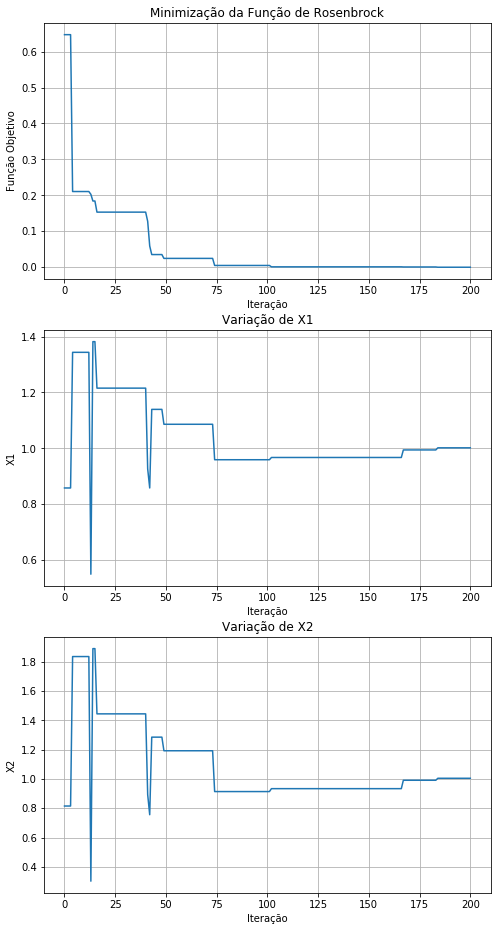

In [5]:
visualiza_resultados(funcao_objetivo, lista_x1, lista_x2)

# Visualização da Convergência

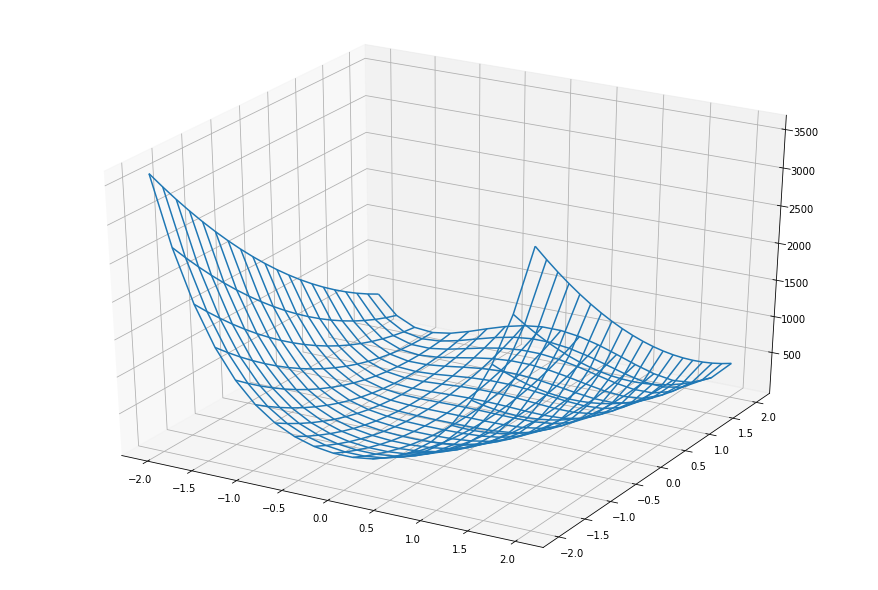

In [7]:
fig2 = plt.figure(figsize=(12,8))

step = 20

x1 = np.linspace(-2, 2, step)
x2 = np.linspace(-2, 2, step)

x1, x2 = np.meshgrid(x1,x2)

z = rosenbrock(x1,x2)
     
ims = []

ax2 = Axes3D(fig2)    

ax2.plot_wireframe(x1,x2,z)

for i in range(len(x1)):

    ims = animate(h_x1[i],h_x2[i],ims,ax2)

anim = animation.ArtistAnimation(fig2,ims, interval=100, repeat_delay=1000)

HTML(anim.to_html5_video())